# Project: Image Classification
## Step 1: Load and Explore the CIFAR-10 Dataset

In [16]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

- **numpy**: Used for numerical computations and handling arrays efficiently.
- **matplotlib.pyplot**: Used to visualize images, graphs, or training performance like accuracy/loss.
- **seaborn**: Advance library for visualizations.
- **tensorflow**: An open-source library for building and training deep learning models.
- **cifar10**: Loads the CIFAR-10 dataset, a collection of 60,000 32x32 color images across 10 categories
- **to_catgorical**: Converts integer labels (e.g., 0-9) into one-hot encoded format for classification tasks.

In [18]:
# load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

- Loads the CIFAR-10 dataset and splits it into:
    - X_train, Y_train: Training images and their labels.
    - X_test, Y_train: Testing images and their labels.
- CIFAR-10 has 60,000 color images (32x32 pixels), with:
    - 50,000 for training and 10,000 for testing.
    - 10 classes (e.g., airplane, car, bird, etc.).

In [22]:
# normalize pixel values (0-255) to (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

- Converts image pixel values from integers (0-255) to floats (0.0-1.0).
- Normalization helps the model train faster and improves accuracy.
- Neural networks perform better when input values are on a similar scale.

In [25]:
# one-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

- Converts class labels (e.g., 3) into one-hot encoded vectors (e.g., [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).
- Required for multiclass classification using categorical cross-entropy loss.
- 10 indicates the number of distinct classes in CIFAR-10.

In [28]:
# class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

- Defines the names of the 10 classes in the CIFAR-10 dataset.
- Helps in mapping model predictions (numerical class indices) to human-readable labels.
- Useful when displaying or interpreting results (e.g., predicted class: 'cat'). 

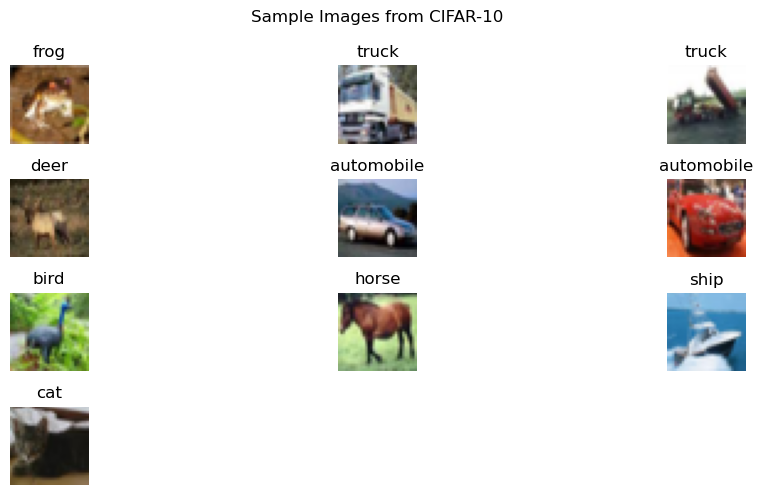

In [31]:
# display sample images
plt.figure(figsize=(10,5))
for i in range(len(class_names)):
    plt.subplot(4, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(Y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10")
plt.tight_layout()
plt.show()

- Creates a figure and loops through the first training images (one from each class).
- Displays each image using **plt.imshow()** with its corresponding class name as the title.
- Uses **np.argmax(Y_train[i])** to convert the one-hot encoded label back to a class index.
- Turns off axes for a cleaner display.
- Adds a main title "Sample Images from CIFAR-10".

## Step 2: Build a CNN from Scratch (Usng Keras)

In [35]:
# import required layers and models from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

- Sequential: Used to build the model layer by layer in a linear stack.
- Conv2D: Applies convolution filters to extract features from input images.
- MaxPooling2D: Reduces spatial dimensions (height/width) to downsample feature maps.
- Flatten: Converts 2D feature maps into 1D vector for the dense layers.
- Dense: Fully connected layer used for classification or intermediate layers.
- Dropout: Helps prevent overfitting by randomly disabling neurons during training.

In [38]:
# build the cnn model
model = Sequential()

- Initializes a sequential model where layers are added one after another.
- It's the starting point to build a CNN by stacking layers like Conv2D, MaxPooling, Flatten, etc.

In [41]:
# first convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

**First Convolutional Block**
- Adds a Conv2D layer with 32 filter, 3x3 kernel, and ReLU activation.
- padding='same' keeps the output size same as input.
- input_shape=(32, 32, 3) defines input size for dataset (32x32 RGB image).
- Adds a second Conv2D layer with same parameters. Helps the network learn more complex features.
- Adds a MaxPooling2D to reduce spatial size (downsampling) to lower computation. Takes the maximum value from each 2x2 block.
- Adds a Dropout to randomly drops 25% of the neurons during training to prevent overfitting.

In [44]:
# second convolutional layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

**Second Convolutional Block**
- Adds a Conv2D layer with 64 filters and ReLU activation. Higher filter count helps detect more complex patterns.
- Adds another 64-filter convolution layer to increase learning capacity.
- Again downsamples the feature map size using 2x2 max pooling.
- Randomly drops 25% of neurons to reduce overfitting.

In [47]:
# flatten before fully connected layers
model.add(Flatten())

- Converts the 3D feature maps into a 1D vector.
- Prepares the data for input into the fully connected (dense) layers.

In [50]:
# fully connected (Dense) layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # regularization to prevent overfitting

- Dense(512, activation='relu'): Adds a fully connected layer with 512 neurons and ReLU activation for introducing non-linearity.
- Adds a Dropout(0.5) to randomly drops 50% of the neurons during training to prevent overfitting and improve generalization.

In [53]:
# output layer
model.add(Dense(10, activation='softmax')) # 10 classes

- Dense(10): Final layer with 10 neurons, one for each class in CIFAR-10.
- activation='softmax': Converts the output into probabilities summing to 1, used for multi-class classification.

In [56]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- optimizer='adam': Adaptive optimizer that adjusts learning rates for better performance.
- loss='categorical_crossentropy': Appropriate loss function for multi-class classification with one-hot encoded labels.
- metrics=['accuracy']: Track the accuracy metric during training and evaluation.

In [59]:
# we use data augmentation to better generalization 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)

- ImageDataGenerator: Automatically generates augmented image batches during training.
- rotation_range=15: Randomly rotates images by upto 15 degrees.
- width_shift_range=0.1, height_shift_range=0.1: Randomly shifts the image along width and height by 10%.
- horizontal_flip=True: Randomly flips images horizontally.
- datagen.fit(X_train): Prepares the generator by calculating required statistics from training data.

**Purpose:**
- Augmentation helps prevent overfitting and improves model performance by making the model more robust to variations in input images.

In [62]:
# print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

- Defines the layers learning and parameters.

## Step 3: Model Training and Evaluation

In [66]:
# train the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 85ms/step - accuracy: 0.3178 - loss: 1.8319 - val_accuracy: 0.5676 - val_loss: 1.1906
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5320 - loss: 1.3039 - val_accuracy: 0.6297 - val_loss: 1.0397
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5887 - loss: 1.1494 - val_accuracy: 0.6651 - val_loss: 0.9498
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.6280 - loss: 1.0527 - val_accuracy: 0.7028 - val_loss: 0.8479
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6574 - loss: 0.9746 - val_accuracy: 0.7138 - val_loss: 0.8369
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6732 - loss: 0.9339 - val_accuracy: 0.7201 - val_loss: 0.8172
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6867 - loss: 0.9014 - val_accuracy: 0.7528 - val_loss: 0.7256
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7014 - loss: 0.8646 - 

- model.fit(...): Trains the CNN model using the dataset.
- datagen.flow(...): Applies real-time data augmentation (like rotation, flip, etc.) to learning training images to improve generalization.
- batch_size=64: Trains in mini-batches of 64 images at a time.
- epochs=20: Runs for 20 complete passes through the training data.
- validation_data=(X_test, Y_test): Evaluates model performace on the test set after each epoch to track overfitting or improvement.
- This step returns a history object containing training and validation accuracy/loss which we can plot later.

In [69]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7931 - loss: 0.6064
Test Accuracy: 0.7944


- model.evaluate(...): Evaluates the model's performance on the test dataset (unseen data).
- test_loss: Measures how well the model predicts (lower is better).
- test_accuracy: Indicates the proportion of correct predictions.
- print(...): Displays the test accuracy in a readable format (4 decimal places).
- This step helps verify how well the model genealizes to new data.

**Interpretation**:
- Accuracy of 79.44% means CNN model correctly classified about 79 out of 100 images.
- Loss of 0.6064 suggests the model's predictions are reasonably close to actual labels.

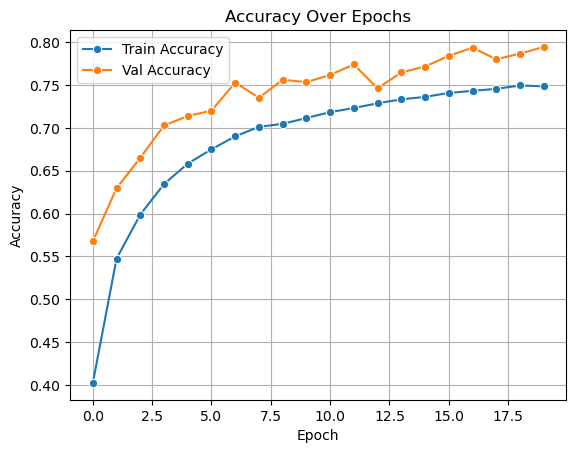

In [72]:
# accuracy
sns.lineplot(history.history['accuracy'], label='Train Accuracy', marker='o')
sns.lineplot(history.history['val_accuracy'],label='Val Accuracy', marker='o')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

- Plots the training accuracy recorded at each epoch.
- marker='o' adds circle markers to highlight points.
- Plots validation accuracy to compare performance on unseen data.
- plt.legend(): Displays the legend to distinguish between training and validation curves.
- Sets the title of the plots for context.
- Labels the X and Y axes respectively.
- Adds grid lines for better readability.
- plt.show(): Renders the final plot.

**Why This Matters**:

This plot helps visualize how well the model is learning over time and wheather it's overfitting or underfitting. 

**Chart**:

This graph displays the training and validation accuracy for each epoch during model training:
-  Blue Line (Train Accuracy): Shows how well the model performed on the training data after each epoch.
-  Orange Line (Validation Accuracy): Reflects how well the model generalizes to unseen data.

**key Observations**:
- Accuracy improves steadily during early epochs.
- Validation accuracy reaches around 78-80%, indicating good generalization.
- The gap between training and validation is small, suggesting the model is not overfitting.

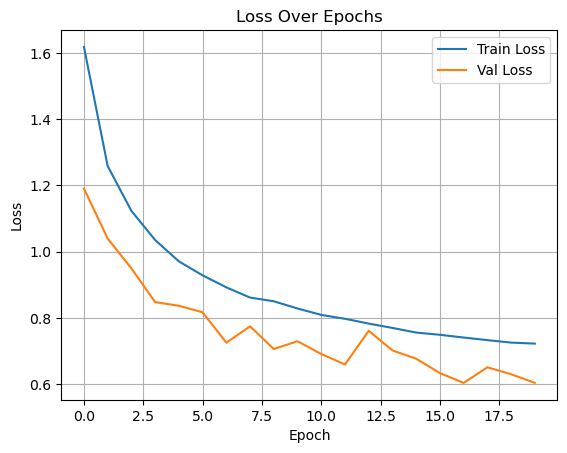

In [75]:
# loss
sns.lineplot(history.history['loss'], label='Train Loss')
sns.lineplot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

This line chart shows the progression of training loss and validation loss over each epoch:
- Training Loss: Shows how well the model is fitting the training data.
- Validation Loss: Measures the model's generalization to unseen (test) data.

**Observations**:
- Both losses consistently decrease, which indicates effective learning.
- The validation loss remains lower than training loss, a positive sign of generalization.
- No signs of severe overfitting, both curves follow a similar downward trend.

A smooth decreasing loss curve, especially in validation, implies a healthy and well-regularized CNN model.

In [78]:
# import libraries for evaluate using metrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

- confusion_matrix: Computes a matrix to visualize prediction vs actual class distribution.
- classification_report: Provides precision, recall, f1-score, and support for each class.
- ConfusionMatrixDisplay: Plots the confusion matrix as a visual heatmap for easy interpretation.

In [81]:
# prediction on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


- Predicts class probability for all images in the test set.
- Coverts probability vectors to predicted class labels (highest probability index).
- Converts one-hot encoded true labels back to original class labels.

These steps are essential for evaluation with metrics like cinfusion matrix and classification report.

In [83]:
# report
print("Classification Report:\n\n", classification_report(y_true, y_pred_classes))

Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.83      0.95      0.89      1000
           2       0.84      0.56      0.67      1000
           3       0.73      0.55      0.63      1000
           4       0.77      0.73      0.75      1000
           5       0.73      0.74      0.73      1000
           6       0.70      0.92      0.80      1000
           7       0.82      0.88      0.85      1000
           8       0.92      0.85      0.89      1000
           9       0.84      0.91      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



- Print the classification report.

**Evaluation**:
- Evaluates the model's performance on each of the 10 classes in the dataset.
- Metrics included:
    - Precision: How many of the predicted positives are actually correct.
    - Recall: How many actual positives were correctly identified.
    - F1-Score: Harmonic mean of precision and recall, useful for imbalanced classes.
    - Support: Number of actual samples for each class.

**Insights**:
- Best performing classes:
    - Class 1 (Automobile): Precision 0.87, Recall 0.93, F1-score 0.90
    - Class 8 (Ship) and Class 9 (Truck) also perform very well.
- Challenging classes:
    - Class 2 (Bird), Class 3 (Cat) have relatively lower F1-score, indicating difficulty in distinguishing them.
- Overall accuracy:
    - 79%, which is a good performance for a CNN on a raw CIFAR-10 without heavy tuning.

In [87]:
# matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n\n", cm)

Confusion Matrix:

 [[839  33  15   6  10   1   7   9  36  44]
 [  3 950   0   1   0   2   3   1   2  38]
 [ 78  10 564  32  91  64 112  30   5  14]
 [ 19  17  34 551  46 145 111  40  13  24]
 [ 15   5  29  22 735  20 104  62   6   2]
 [  7   7  12 103  39 739  34  45   2  12]
 [  9   2   8  17  15  16 922   3   3   5]
 [ 13   6   8  16  23  30   9 884   0  11]
 [ 58  44   2   4   1   1   6   3 855  26]
 [  7  71   2   0   0   1   3   5   6 905]]


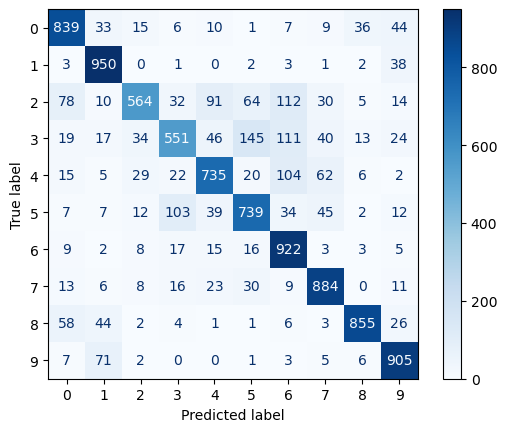

In [89]:
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

- Creates a visual object to display the confusion matrix cm generated from the model predictions vs actual labels.
- Plots the confusion matrix with a blue color map for better visualization of classification performance.
- Displays the plotted confusion matrix.

**Explanation**:

The confusion matrix compares actual labels (rows) with predicted labels (columns) on the test dataset
- Each row: actual class
- Each column: predicted class
- Diagonal values: correctly classified samples

**Highlights**:
- Class 0 (airplane): 839 correct, some misclassified as class 8 and 9
- Classs 1 (automobile): 950 correct, strong performance
- Class 6 (frog): 922 correct, very high accuracy
- Class 3 (cat): 551 correct, often confused with class 5 (dog) and 6(frog)
- Class 2 (bird) and class 3 (cat) show most confusion across multiple other classes.

We can further increase this by adding more layers.

## Step 4: Actual vs Predicted Images

In [93]:
def predict_image(index):
    image = X_test[index]
    true_label = int(np.argmax(Y_test[index]))
    img_input = np.expand_dims(image, axis=0)
    prediction = model.predict(img_input)
    predicted_class = int(np.argmax(prediction))

    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Predicted: {class_names[predicted_class]} | Actual: {class_names[true_label]}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


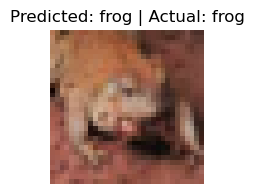

In [95]:
predict_image(5)

This function takes a test image by index and:
- Predicts its class using CNN model
- Displays the image with both the predicted and actual labels

## Step 5: Save The Model 

In [99]:
model.save("cifar10_cnn_model.keras")

- This command saves the entire model, including its architecture, weights, and training configuration.
- We can later load it using keras.models.load_model(...).